# Ford GoBike Data Exploration
### by Nick Zwart

## Preliminary Wrangling
This document explores a dataset about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

% matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [4]:
df.dropna(subset=['member_birth_year'], how='all', inplace = True)
df.dropna(subset=['member_gender'], how='all', inplace = True)

In [5]:
df.member_birth_year = df.member_birth_year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null int64
member_gender              453159 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 55.3+ MB


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female
12,2183,2017-12-31 23:52:55.5810,2018-01-01 00:29:18.7430,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male


In [7]:
df.drop('start_station_latitude', axis=1, inplace=True)
df.drop('start_station_longitude', axis=1, inplace=True)
df.drop('end_station_latitude', axis=1, inplace=True)
df.drop('end_station_longitude', axis=1, inplace=True)

In [8]:
df['start_time'] = pd.to_datetime(df['start_time'])

df['start_year'] = df['start_time'].dt.year
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.day

df['end_time'] = pd.to_datetime(df['end_time'])

df['end_year'] = df['end_time'].dt.year
df['end_month'] = df['end_time'].dt.month
df['end_day'] = df['end_time'].dt.day

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_year,start_month,start_day,end_year,end_month,end_day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987,Male,2017,12,31,2018,1,1
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,1965,Female,2017,12,31,2018,1,1
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,1997,Female,2017,12,31,2018,1,1
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,259,Addison St at Fourth St,3539,Customer,1991,Female,2017,12,31,2018,1,1
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,24,Spear St at Folsom St,2311,Subscriber,1990,Male,2017,12,31,2018,1,1


In [10]:
df = df[['duration_sec', 'start_time', 'start_year', 'start_month', 'start_day', 'end_time',
        'end_year', 'end_month', 'end_day', 'start_station_id', 'start_station_name', 'end_station_id',
         'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender']]

In [11]:
df.head()

,duration_sec,start_time,start_year,start_month,start_day,end_time,end_year,end_month,end_day,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.654,2017,12,31,2018-01-01 15:12:50.245,2018,1,1,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987,Male
1,78800,2017-12-31 15:56:34.842,2017,12,31,2018-01-01 13:49:55.617,2018,1,1,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,1965,Female
4,43603,2017-12-31 14:23:14.001,2017,12,31,2018-01-01 02:29:57.571,2018,1,1,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,1997,Female
6,4507,2017-12-31 23:49:28.422,2017,12,31,2018-01-01 01:04:35.619,2018,1,1,259,Addison St at Fourth St,259,Addison St at Fourth St,3539,Customer,1991,Female
12,2183,2017-12-31 23:52:55.581,2017,12,31,2018-01-01 00:29:18.743,2018,1,1,67,San Francisco Caltrain Station 2 (Townsend St...,24,Spear St at Folsom St,2311,Subscriber,1990,Male


In [12]:
df.shape

(453159, 17)

### What is the structure of your dataset?
This dataset has 453159 rows and contains 17 columns.

### What is/are the main feature(s) of interest in your dataset?
I want to find out which gender uses this service the most. Finding out how long the average trip takes sounds also interesting to me. I also want to find out when most trips are taken in terms of time of day, day of the week, or month of the year. I also think it might be interesting to find out if subscribers behave differently than customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think the 'member_gender' column will help me to answer my first question. In order to answer the second question I think the 'duration_sec' column will come in handy. For the third question the 'duration_sec', 'start_month' and 'start_day' column will come in handy. The last question can be answered by using the 'duration_sec', 'start_month', 'start_day' and 'user_type' column.

## Univariate Exploration
I'll start looking by which gender uses this service the most.

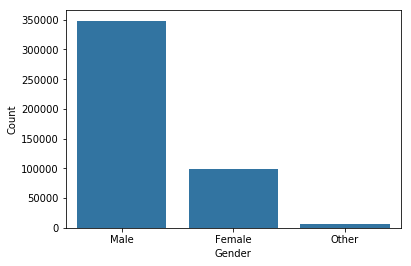

In [23]:
base_color = sb.color_palette()[0]
cat_order = df['member_gender'].value_counts().index
sb.countplot(data = df, x = 'member_gender', color = base_color, order = cat_order)
plt.xlabel('Gender')
plt.ylabel('Count');

Interesting, it seems that males use this service way more than females do. Let's continue with the next point. Now I want to know how long the average trip takes.

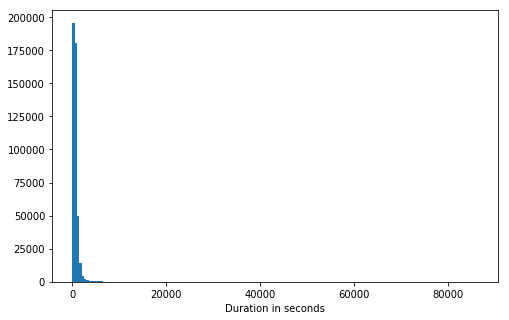

In [14]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in seconds')
plt.show()

There is a long tail in the distribution making the visualization useless. Lets put it on a log scale and see if that imporeves the visualization.

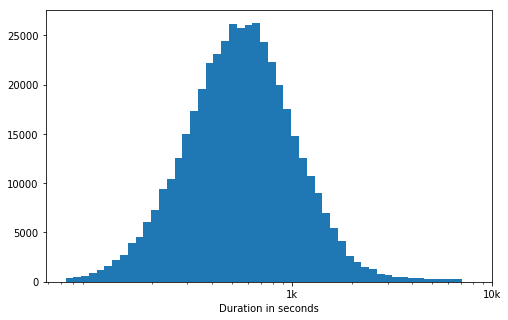

In [15]:
log_binsize = 0.05
bins = 6 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10e2, 10e3], ['1k', '10k'])
plt.xlabel('Duration in seconds')
plt.show()

If we plot the duration in secondes on a log-scale, we can see that the distribution looks normalilly distributed. The peak is a little below the 1k mark meaning that the mean duration in seconds should somewhere around the 700 - 900 mark. Let's find out what the mean duration in seconds is.

In [16]:
df.duration_sec.mean()

832.9340143305109

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration_sec column took on a large range of values, so I looked at the data using a log transform. Under the transformation the data looked normally distributed, with the mean around 800 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I didn't have to do this.

## Bivariate Exploration
Now that I know the mean duration of the trips I want to find out when most trips are taken in terms of time of day, day of the week, or month of the year.

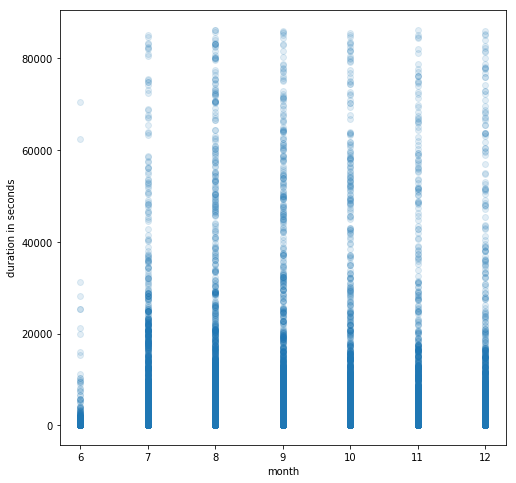

In [17]:
plt.figure(figsize=[8, 8])
plt.scatter(data = df, x = 'start_month', y = 'duration_sec', alpha = 1/8)
plt.xlabel('month')
plt.ylabel('duration in seconds');

It looks like that the service wasn't really popular in month 6 (June). After a quick search I found out that the service was launched that month so it seems very logical that not a lot of people were using it since it was brand new. After June the service really took off and you can see that it's popularity stayed the same. There is a slight decrease in month 12 (December) which can be explained by the holidays and people traveling to family or out of the country.

link used: https://en.wikipedia.org/wiki/Ford_GoBike

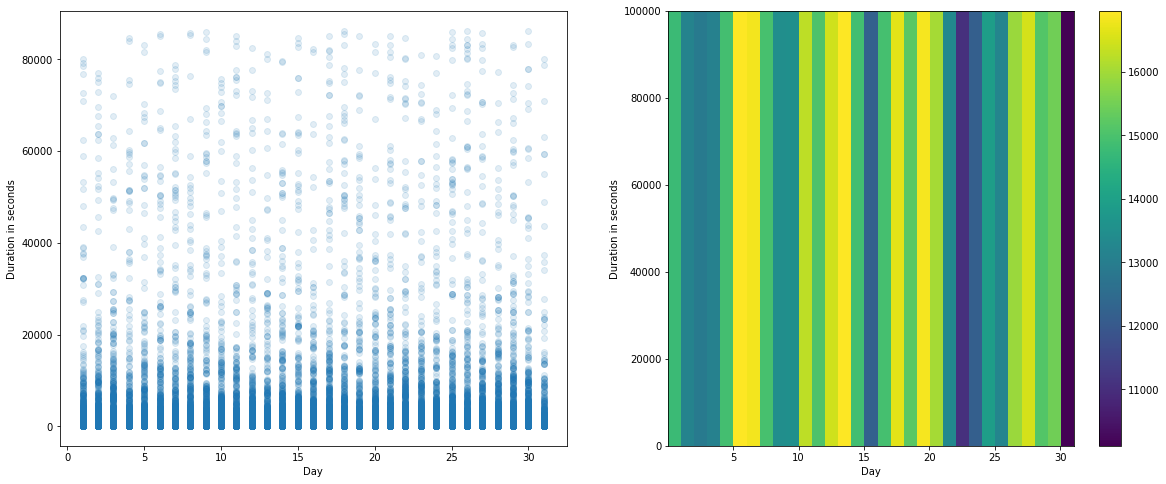

In [18]:
plt.figure(figsize = [20, 8])

#Scatterplot
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'start_day', y = 'duration_sec', alpha = 1/8)
plt.xlabel('Day')
plt.ylabel('Duration in seconds');

#Heatmap
plt.subplot(1, 2, 2)
bins_x = np.arange(0.05, 31+1, 1)
bins_y = np.arange(-0.05, 100000+1, 100000)
plt.hist2d(data = df, x = 'start_day', y = 'duration_sec',
           bins = [bins_x, bins_y])
plt.xlabel('Day')
plt.ylabel('Duration in seconds')
plt.colorbar();

This scatterplot shows that the most trips were made on day 6 (Saturday) and that the least trips were made on day 31 (Wednesday). If I look deeper into it I can see that day 6 (Saturday), 14 (Sunday), 20 (Saturday), 7 (Sunday), 18 (Thursday), 28 (Sunday), 13 (Saturday), 11 (Thursday), 21 (Sunday), 27 (Saturday) are the top 10 busiest days. 8 out of those 10 days are either on a Saturday or Sunday. It's safe to say that these bikes get used more on the weekends.

Since it's kinda hard to see on the scatterplot I decided to add a heatmap. The lighter the bar, the more trips were taken that day.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I found out that after the launch of the service the service really took off. I also found out that it decreased in December which could be holiday related. After looking at it on a daily level I found out this service get used way more often during the weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Not really.

## Multivariate Exploration
Now that we found out what the mean duration of the trips is and on which day of the week and which month people are using this service its time to see if there is a difference between subscribers and customers using this service. 

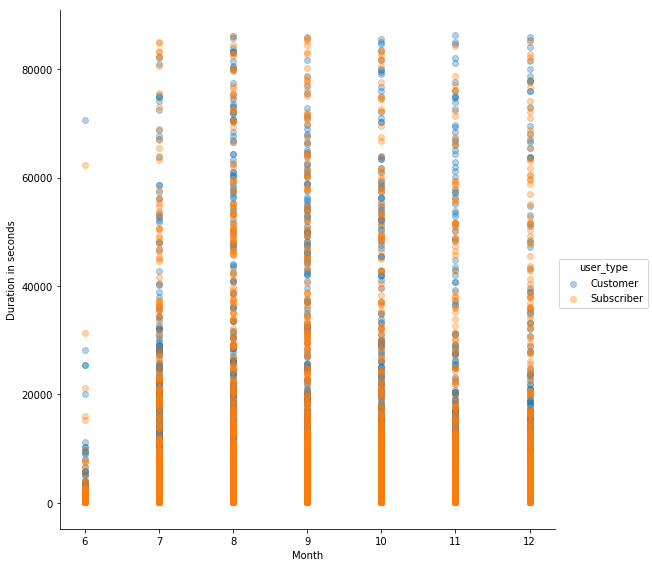

In [19]:
month = sb.FacetGrid(data = df, hue = 'user_type', size = 8)
month.map(plt.scatter, 'start_month','duration_sec', alpha = 1/3)
month.add_legend()
plt.xlabel('Month')
plt.ylabel('Duration in seconds');

We can see that there are way more orange dots than blue dots for every month of the year meaning that there are far more subscribers using this service monthly than regular customers. Let's see if this stays the same if we look at it from a day to day level.

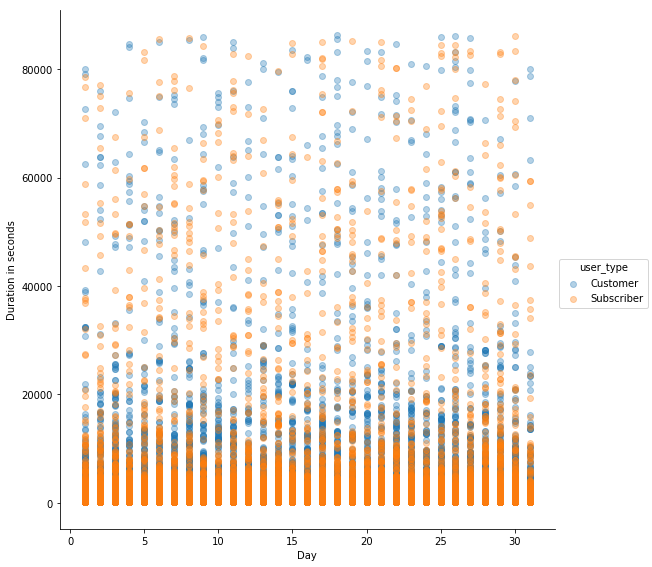

In [20]:
day = sb.FacetGrid(data = df, hue = 'user_type', size = 8)
day.map(plt.scatter, 'start_day','duration_sec', alpha = 1/3)
day.add_legend()
plt.xlabel('Day')
plt.ylabel('Duration in seconds');

There are way more orange dots than blue dots. It's safe to say that subscribers also use this service way more than regular customers on a day to day level.

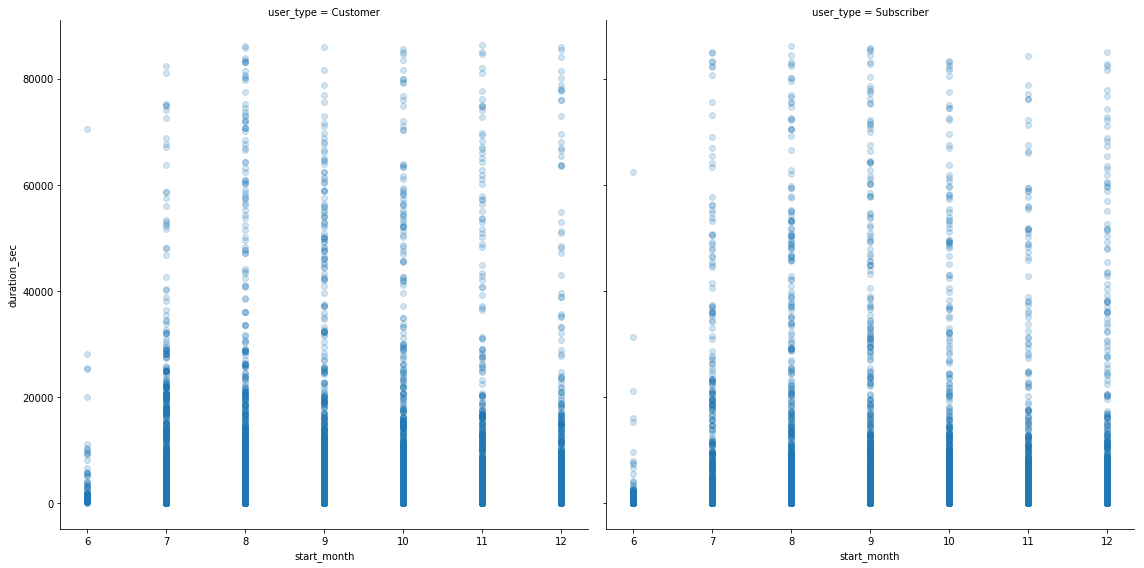

In [21]:
m = sb.FacetGrid(data = df, col = 'user_type', size = 8,
                     col_wrap = 2)
m.map(sb.regplot, 'start_month', 'duration_sec', y_jitter = 0.04, fit_reg = False,
        scatter_kws = {'alpha' : 1/5});

If you put the scatterplots beside each other like this it's kinda hard to see which user type is more common on a monthly level since the most rides are taken for a short duration.

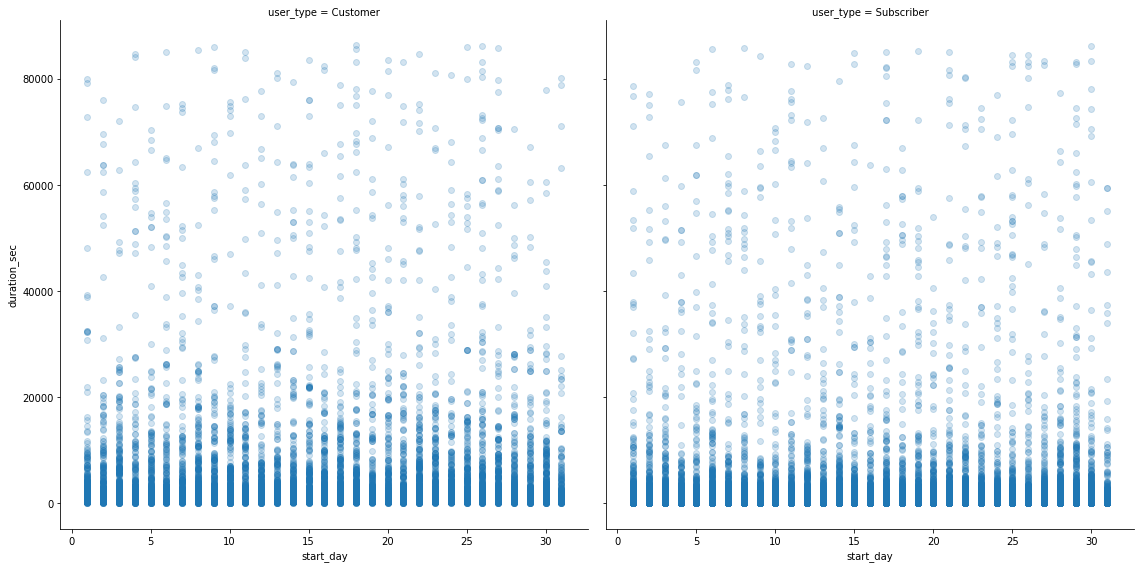

In [22]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 8,
                     col_wrap = 2)
g.map(sb.regplot, 'start_day', 'duration_sec', y_jitter = 0.04, fit_reg = False,
        scatter_kws = {'alpha' : 1/5});

If you put the scatterplots beside each other like this it's kinda hard to see which user type is more common on a daily level since the most rides are taken for a short duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I found out that there are way more subscribers than regular customers. I also found out that there is not really a behavioral diffence between subscribers and customers.

### Were there any interesting or surprising interactions between features?
Not really. Both of the user types behave very similar.